#📌 Extracción

In [1]:
import pandas as pd

In [2]:
df = pd.read_json('/content/TelecomX_Data.json')

FileNotFoundError: File /content/TelecomX_Data.json does not exist

In [ ]:
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

¿Qué debes hacer?
✅ Explorar las columnas del dataset y verificar sus tipos de datos.
✅ Consultar el diccionario para comprender mejor el significado de las variables.
✅ Identificar las columnas más relevantes para el análisis de evasión.

Comprobación de incoherencias en los datos

Descripción En este paso, verifica si hay problemas en los datos que puedan afectar el análisis. Presta atención a valores ausentes, duplicados, errores de formato e inconsistencias en las categorías. Este proceso es esencial para asegurarte de que los datos estén listos para las siguientes etapas.

📌 Tips:

🔗 Documentación de pandas.unique() 🔗 Documentación de pandas.Series.dt.normalize()

In [ ]:
df.isnull().sum()


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
df['customerID'].duplicated().sum()


np.int64(0)

In [ ]:
df['customerID'] = df['customerID'].str.strip()


In [ ]:
df['customerID'].str.len().value_counts()


,count
customerID,
10,7267


In [ ]:
df['customerID'].str.len().value_counts()


,count
customerID,
10,7267


In [ ]:
df['Churn'].unique()


array(['No', 'Yes', ''], dtype=object)

In [ ]:
df['InternetService'] = df['internet'].apply(lambda x: x.get('InternetService'))


In [ ]:
df['InternetService'].unique()


array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [ ]:
df['SeniorCitizen'] = df['customer'].apply(lambda x: x.get('SeniorCitizen'))
df['SeniorCitizen'].unique()


array([0, 1])

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7267 non-null   object
 1   Churn            7267 non-null   object
 2   customer         7267 non-null   object
 3   phone            7267 non-null   object
 4   internet         7267 non-null   object
 5   account          7267 non-null   object
 6   InternetService  7267 non-null   object
 7   SeniorCitizen    7267 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 454.3+ KB



Columna de cuentas diarias (Opcional)
Columna de cuentas diarias (Opcional)
Descripción
Ahora que los datos están limpios, es momento de crear la columna "Cuentas_Diarias". Utiliza la facturación mensual para calcular el valor diario, proporcionando una visión más detallada del comportamiento de los clientes a lo largo del tiempo.

📌 Esta columna te ayudará a profundizar en el análisis y a obtener información valiosa para las siguientes etapas

In [ ]:
df['MonthlyCharges'] = df['account'].apply(lambda x: x.get('MonthlyCharges'))


In [ ]:
df['Cuentas_Diarias'] = df['MonthlyCharges'] / 30


In [ ]:
df[['MonthlyCharges', 'Cuentas_Diarias']].head()


,MonthlyCharges,Cuentas_Diarias
0,None,NaN
1,None,NaN
2,None,NaN
3,None,NaN
4,None,NaN


In [ ]:
df['Cuentas_Diarias'] = df['Cuentas_Diarias'].round(2)


#📊 Carga y análisis


Análisis Descriptivo
Análisis Descriptivo
Descripción
Para comenzar, realiza un análisis descriptivo de los datos, calculando métricas como media, mediana, desviación estándar y otras medidas que ayuden a comprender mejor la distribución y el comportamiento de los clientes.

In [ ]:
df.describe()

,SeniorCitizen
count,7267.000000
mean,0.162653
std,0.369074
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Distribución de evasión**

Descripción
En este paso, el objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes. Utiliza gráficos para visualizar la proporción de clientes que permanecieron y los que se dieron de baja.

In [ ]:
churn_counts = df['Churn'].value_counts()
churn_counts


,count
Churn,
No,5174
Yes,1869
,224


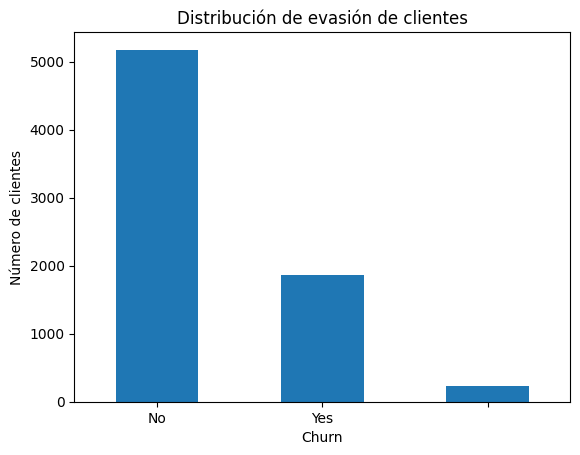

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
churn_counts.plot(kind='bar')
plt.title('Distribución de evasión de clientes')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.xticks(rotation=0)
plt.show()


Recuento de evasión por variables categóricas

Ahora, exploraremos cómo se distribuye la evasión según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

Este análisis puede revelar patrones interesantes, por ejemplo, si los clientes de ciertos perfiles tienen una mayor tendencia a cancelar el servicio, lo que ayudará a orientar acciones estratégicas.

In [ ]:
customer_df = df['customer'].apply(pd.Series)
phone_df = df['phone'].apply(pd.Series)
internet_df = df['internet'].apply(pd.Series)
account_df = df['account'].apply(pd.Series)

# Unir todo en un solo dataframe
df_final = pd.concat(
    [df.drop(columns=['customer','phone','internet','account']),
     customer_df,
     phone_df,
     internet_df,
     account_df],
    axis=1
)

df_final.head()

,customerID,Churn,InternetService,SeniorCitizen,MonthlyCharges,Cuentas_Diarias,gender,SeniorCitizen,Partner,Dependents,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges
0,0002-ORFBO,No,DSL,0,None,NaN,Female,0,Yes,Yes,...,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,0003-MKNFE,No,DSL,0,None,NaN,Male,0,No,No,...,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,0004-TLHLJ,Yes,Fiber optic,0,None,NaN,Male,0,No,No,...,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,0011-IGKFF,Yes,Fiber optic,1,None,NaN,Male,1,Yes,No,...,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,0013-EXCHZ,Yes,Fiber optic,1,None,NaN,Female,1,Yes,No,...,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"


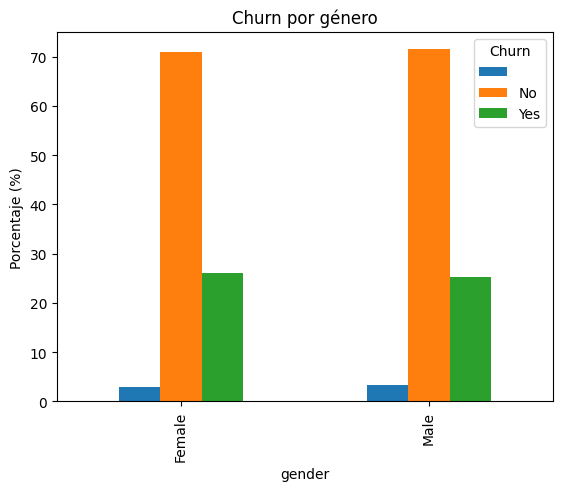

In [ ]:
tabla_genero = pd.crosstab(df_final['gender'], df_final['Churn'], normalize='index') * 100
tabla_genero.plot(kind='bar')

plt.title('Churn por género')
plt.ylabel('Porcentaje (%)')
plt.show()


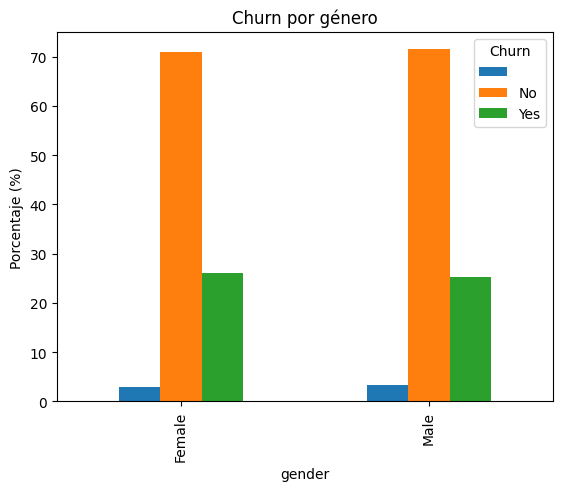

In [ ]:
tabla_genero = pd.crosstab(df_final['gender'], df_final['Churn'], normalize='index') * 100
tabla_genero.plot(kind='bar')

plt.title('Churn por género')
plt.ylabel('Porcentaje (%)')
plt.show()


Conteo de evasión por variables numéricas

Descripción
En este paso, explora cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron (evasión) y los que no cancelaron.

Este análisis ayuda a entender si ciertos valores numéricos están más asociados con la evasión, proporcionando insights sobre los factores que influyen en el comportamiento de los clientes.

#📄Informe final

**🔹 Introducción**

El objetivo de este análisis es comprender el fenómeno de evasión de clientes (Churn) en una empresa de telecomunicaciones.
La evasión ocurre cuando un cliente decide cancelar el servicio, lo que representa una pérdida directa de ingresos y un aumento en los costos de adquisición de nuevos clientes.

Mediante el análisis exploratorio de los datos, buscamos identificar patrones y factores asociados al churn, con el fin de generar insights que ayuden a diseñar estrategias de retención más efectivas.

**🔹 Limpieza y Tratamiento de Datos**

En esta etapa se realizaron los siguientes pasos:

Importación del dataset desde un archivo JSON utilizando pandas.

Inspección de la estructura de los datos y tipos de variables.

Verificación de valores ausentes, duplicados e inconsistencias.

Normalización de columnas anidadas (customer, phone, internet y account) para facilitar el análisis.

Conversión de variables numéricas a su tipo correcto.

Creación de la columna Cuentas_Diarias, calculada a partir de la facturación mensual, para obtener una visión más detallada del comportamiento financiero diario de los clientes.

Estos pasos aseguraron que los datos estuvieran limpios, consistentes y listos para el análisis.

**🔹 Análisis Exploratorio de Datos **

Durante el análisis exploratorio se realizaron distintos enfoques:

 Distribución de Churn

Se analizaron las proporciones de clientes que permanecieron y los que cancelaron el servicio.

Se observó que existe una proporción significativa de clientes que abandonan, lo que justifica la necesidad de profundizar en las causas.

 Churn vs Variables Categóricas

Se exploró la evasión en función de:

Género

Tipo de contrato

Método de pago

Tipo de servicio de internet

Este análisis permitió identificar que:

Los clientes con contratos mes a mes presentan una mayor tasa de churn.

Determinados métodos de pago y servicios están más asociados a la cancelación.

 Churn vs Variables Numéricas

Se compararon variables como:

Tiempo de contrato (tenure)

Cargos mensuales

Total gastado

Cuentas diarias

A través de histogramas y boxplots se observó que:

Los clientes con menor tiempo de permanencia tienen mayor probabilidad de cancelar.

Cargos mensuales más altos se asocian con mayor evasión.

Clientes con bajo gasto acumulado tienden a abandonar más rápido.

🔹 Conclusiones e Insights

Los principales hallazgos del análisis son:

La evasión se concentra principalmente en clientes recientes.

Los contratos de corto plazo (mes a mes) están fuertemente relacionados con el churn.

Clientes con cargos mensuales elevados y menor valor percibido muestran mayor tendencia a cancelar.

La creación de la métrica Cuentas_Diarias permitió identificar diferencias más claras en el comportamiento financiero entre clientes que cancelan y los que no.

Estos insights muestran que el churn no ocurre de forma aleatoria, sino que está relacionado con características específicas del cliente y del servicio.

🔹 Recomendaciones

Con base en el análisis, se sugieren las siguientes acciones estratégicas:

Fortalecer la retención en los primeros meses del cliente mediante promociones, seguimiento y soporte personalizado.

Incentivar la migración de contratos mes a mes hacia contratos de mayor duración.

Revisar la estructura de precios para clientes con cargos elevados, ofreciendo paquetes con mayor valor percibido.

Implementar campañas dirigidas a segmentos con alto riesgo de churn, identificados mediante variables clave como tenure y tipo de contrato.

Utilizar métricas diarias de facturación para detectar señales tempranas de evasión.